In [1]:
from IPython.display import HTML, display

def set_background(color):
    script = ("var cell = this.closest('.code_cell');"
              "var editor = cell.querySelector('.input_area');"
              "editor.style.background='{}';" 
              "this.parentNode.removeChild(this)"
             ).format(color)
    display(HTML('<img src onerror="{}">'.format(script)))
    
    
set_background('')

In [2]:
import tensorflow as tf
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [24]:
cd A:\STAT4012

A:\STAT4012


In [6]:
#from IPython.core.magic import register_cell_magic

#set_background('')

#@register_cell_magic
#def background(color, cell):
#    set_background(color)
#    return eval(cell)

In [4]:
set_background('')

from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import os
from PIL import Image
from IPython.display import Image
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
from ipyfilechooser import FileChooser
import cv2 as cv
import re
import pickle
import polyblur
from polyblur import polyblur_deblurring
from ipywidgets import HBox, VBox,Layout
%matplotlib inline
import tensorflow_addons as tfa
import cv2
import neptune
from tensorflow_addons.layers import InstanceNormalization
from tensorflow.keras.layers import Conv2D, LSTM, Dense, Flatten, Dropout, MaxPooling2D, Activation, TimeDistributed,BatchNormalization
from tensorflow.keras.models import Sequential
#import neptune
import keras
import io
#from neptune.integrations.tensorflow_keras import NeptuneCallback
from keras import optimizers
from keras import initializers
from sklearn.metrics import fbeta_score,accuracy_score
from sklearn.metrics import classification_report

In [5]:
class smoothing:
    def __init__(self, image):
        self.image = image
        self.all_list={'Polyblur':polyblur_deblurring(self.image, n_iter=5, alpha=3, beta=5, c=0.352, b=0.768),
                       'Kernal': cv.filter2D(self.image,-1,np.ones((3,3),np.float32)/np.ones((3,3),np.float32).size),
                       'Mean':cv.blur(img,(5,5)),
                       'Gaussian':cv.GaussianBlur(img,(5,5),0),
                       'Median':cv.medianBlur(img,5),
                       'Bilateral':cv.bilateralFilter(img,5,75,75)
                      }
    def plot_all(self):
        fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(12, 4))
        for a,b in enumerate(self.all_list):
            axes[a].imshow(self.all_list[b])
            axes[a].set_title(b)
            axes[a].axis('off')
    def plot_graph(self,graph,graphname):
        self.is_same(graph)
        fig, axs = plt.subplots(1,2,figsize=(12, 4))
        axs[0].imshow(self.image)
        axs[0].title.set_text('Original')
        axs[1].imshow(graph)
        axs[1].title.set_text(graphname)
        plt.setp(axs, xticks=[],yticks=[])
        plt.show()
    def polyblurplot(self,aab=None):
        poly_blur = polyblur_deblurring(self.image, n_iter=polyblur_iterr.value, alpha=polyblur_alphaa.value, beta=polyblur_betaa.value, c=0.352, b=0.768)
        self.all_list['Polyblur']=poly_blur
        self.plot_graph(poly_blur,'Polyblur')
    def kernalplot(self,aac=None):
        kernal = np.ones((kernal_size.value,kernal_size.value),np.float32)/np.ones((kernal_size.value,kernal_size.value),np.float32).size
        self.plot_graph(cv.filter2D(self.image,-1,kernal),'Kernal')
        self.all_list['Kernal']=cv.filter2D(self.image,-1,kernal)
    def meanplot(self,aad=None):
        self.plot_graph(cv.blur(img,(kernal_size.value,kernal_size.value)),'Mean')
        self.all_list['Mean']=cv.blur(img,(kernal_size.value,kernal_size.value))
    def gaussianplot(self,aae=None):
        self.plot_graph(cv.GaussianBlur(img,(kernal_size.value,kernal_size.value),gaussian_sigma.value),'Gaussian')
        self.all_list['Gaussian']=cv.GaussianBlur(img,(kernal_size.value,kernal_size.value),gaussian_sigma.value)
    def medianplot(self,aaf=None):
        self.plot_graph(cv.medianBlur(img,noise_percentage.value),'Median')
        self.all_list['Median']=cv.medianBlur(img,noise_percentage.value)
    def bilateralplot(self,aaf=None): 
        self.plot_graph(cv.bilateralFilter(img,kernal_size.value,sigmaspace.value,sigmacolor.value),'Bilateral')
        self.all_list['Bilateral']=cv.bilateralFilter(img,kernal_size.value,sigmaspace.value,sigmacolor.value)
    def show(self,aaa=None):
        fig, ax = plt.subplots(1,1)
        plt.imshow(self.image)
        plt.title('Original')
        plt.setp(ax, xticks=[],yticks=[])
        plt.show()
    def is_same(self,another):
        try:
            if not np.allclose(self.image,another):
                centered('The original and filtered images are not the same')
        except ValueError:
            centered('The original and filtered images are not the same')
    def show_all(self,aah=None):
        fig, axes = plt.subplots(1,6,figsize=(12, 4))
        for a,b in enumerate(self.all_list):
            axes[a].imshow(self.all_list[b])
            axes[a].set_title(b)
            axes[a].axis('off')
        plt.show()

slider_color = 'lightblue'

polyblur_iterr = widgets.IntSlider(
                                 value=5,
                                 min=0,
                                 max=30,
                                 step=1,
                                 description='Iteration:',
                                 disabled=False,
                                 continuous_update=False,
                                 orientation='horizontal',
                                 readout=True,
                                 readout_format='d'
                                 )
polyblur_iterr.style.handle_color = slider_color


polyblur_alphaa = widgets.FloatSlider(
                                    value=30.,
                                    min=1.,
                                    max=100,
                                    step=0.5,
                                    description='Alpha:',
                                    readout_format='.1f',
                                    )
polyblur_alphaa.style.handle_color = slider_color


polyblur_betaa = widgets.FloatSlider(
                                    value=30.,
                                    min=1.,
                                    max=100,
                                    step=0.5,
                                    description='Beta:',
                                    readout_format='.1f',
                                    )
polyblur_betaa.style.handle_color = slider_color


kernal_size = widgets.IntSlider(
                                 value=5,
                                 min=0,
                                 max=100,
                                 step=1,
                                 description='Kernal:',
                                 disabled=False,
                                 continuous_update=False,
                                 orientation='horizontal',
                                 readout=True,
                                 readout_format='d'
                                 )
kernal_size.style.handle_color = slider_color


gaussian_sigma = widgets.FloatSlider(
                                    value=0.,
                                    min=0.,
                                    max=50,
                                    step=0.5,
                                    description='Sigma:',
                                    readout_format='.1f',
                                    )
gaussian_sigma.style.handle_color = slider_color


noise_percentage = widgets.IntSlider(
                                    value=1,
                                    min=0,
                                    max=10,
                                    step=1,
                                    description='Percentage of noise:',
                                    readout_format='d',
                                    )
noise_percentage.style.handle_color = slider_color


sigmaspace = widgets.IntSlider(
                                    value=75,
                                    min=0,
                                    max=100,
                                    step=1,
                                    description='Sigmaspace:',
                                    readout_format='d',
                                    )
sigmaspace.style.handle_color = slider_color


sigmacolor = widgets.IntSlider(
                                    value=75,
                                    min=0,
                                    max=100,
                                    step=1,
                                    description='Sigmacolor:',
                                    readout_format='d',
                                    )
sigmacolor.style.handle_color = slider_color

In [6]:
output = widgets.Output()
plot_output = widgets.Output()

button_color = '#B8B8B8'

button_for_original = widgets.Button(
                        description='Show original'
                        )
button_for_original.style.button_color = button_color

def button_for_orginal_clicked(aaa):
    output.clear_output()
    plot_output.clear_output()
    with plot_output:
        smoothers.show()
button_for_original.on_click(button_for_orginal_clicked)

#########################################

button_for_polyblur = widgets.Button(
                        description='Confirm',
                        button_style='danger'
                        )
button_for_polyblur.style.button_color = button_color

def button_for_polyblur_clicked(aab):
    output.clear_output()
    plot_output.clear_output()
    with plot_output:
        smoothers.polyblurplot()
button_for_polyblur.on_click(button_for_polyblur_clicked)

#########################################

button_for_kernal = widgets.Button(
                        description='Confirm',
                        button_style='danger'
                        )
button_for_kernal.style.button_color = button_color

def button_for_kernal_clicked(aac):
    output.clear_output()
    plot_output.clear_output()
    with plot_output:
        smoothers.kernalplot()
button_for_kernal.on_click(button_for_kernal_clicked)

#########################################

button_for_mean = widgets.Button(
                        description='Confirm',
                        button_style='danger'
                        )
button_for_mean.style.button_color = button_color

def button_for_mean_clicked(aad):
    output.clear_output()
    plot_output.clear_output()
    with plot_output:
        smoothers.meanplot()
button_for_mean.on_click(button_for_mean_clicked)

#########################################

button_for_gaussian = widgets.Button(
                        description='Confirm',
                        button_style='danger'
                        )
button_for_gaussian.style.button_color = button_color

def button_for_gaussian_clicked(aae):
    output.clear_output()
    plot_output.clear_output()
    with plot_output:
        smoothers.gaussianplot()
button_for_gaussian.on_click(button_for_gaussian_clicked)

#########################################

button_for_median = widgets.Button(
                        description='Confirm',
                        button_style='danger'
                        )
button_for_median.style.button_color = button_color

def button_for_median_clicked(aaf):
    output.clear_output()
    plot_output.clear_output()
    with plot_output:
        smoothers.medianplot()
button_for_median.on_click(button_for_median_clicked)

#########################################

button_for_bilateral = widgets.Button(
                        description='Confirm',
                        button_style='danger'
                        )
button_for_bilateral.style.button_color = button_color
def button_for_bilateral_clicked(aag):
    output.clear_output()
    plot_output.clear_output()
    with plot_output:
        smoothers.bilateralplot()
button_for_bilateral.on_click(button_for_bilateral_clicked)
#########################################

show_all_button = widgets.Button(
                        description='Show all',
                        button_style='danger'
                        )
show_all_button.style.button_color = button_color
def show_all_button_clicked(aah):
    output.clear_output()
    plot_output.clear_output()
    with plot_output:
        smoothers.show_all()
    with output:
        smoothers.show()
        
show_all_button.on_click(show_all_button_clicked)

In [14]:
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [15]:
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

In [16]:
'''
import os
import cv2

listname = ['Alfred_Sisley/','Francisco_Goya/', 'Marc_Chagall/','Paul_Gauguin/','Paul_Klee/','Rembrandt/','Rene_Magritte/','Titian/'] 

for direc in listname:
    file = []
    for filename in os.listdir(direc):              #read all filenames under the folder
        file.append(filename)
    for name in file:                               #for each file, read and smooth it
        img = cv2.imread(direc+name)
        if img is None:
            continue
        gauss = cv2.GaussianBlur(img,(5,5),4)
        bilater = cv2.bilateralFilter(img,10,47,38)
        picname_gauss = name.replace('.jpg','_gauss')
        picname_bilat = name.replace('.jpg','_bilateral')
        cv2.imwrite(direc+picname_gauss+".jpg", gauss)
        cv2.imwrite(direc+picname_bilat+".jpg", bilater)
'''

'\nimport os\nimport cv2\n\nlistname = [\'Alfred_Sisley/\',\'Francisco_Goya/\', \'Marc_Chagall/\',\'Paul_Gauguin/\',\'Paul_Klee/\',\'Rembrandt/\',\'Rene_Magritte/\',\'Titian/\'] \n\nfor direc in listname:\n    file = []\n    for filename in os.listdir(direc):              #read all filenames under the folder\n        file.append(filename)\n    for name in file:                               #for each file, read and smooth it\n        img = cv2.imread(direc+name)\n        if img is None:\n            continue\n        gauss = cv2.GaussianBlur(img,(5,5),4)\n        bilater = cv2.bilateralFilter(img,10,47,38)\n        picname_gauss = name.replace(\'.jpg\',\'_gauss\')\n        picname_bilat = name.replace(\'.jpg\',\'_bilateral\')\n        cv2.imwrite(direc+picname_gauss+".jpg", gauss)\n        cv2.imwrite(direc+picname_bilat+".jpg", bilater)\n'

In [7]:
def centered(content):
    display(HTML(f"<div style='text-align:center'>{content}</div>"))


def save_variable(v,filename):
    f=open(filename,'wb')
    pickle.dump(v,f)
    f.close()
    return filename
 
def load_variavle(filename):
    f=open(filename,'rb')
    r=pickle.load(f)
    f.close()
    return r
 

# <font color='397301'><h1 align="center">STAT4012</h1><font>
# <font color='397301'><h4 align="center">Report Notebook</h4><font>


# <a class='anchor' id='top'><font color='289C4E'><h3 align="center">Table of contents</h3><font></a>
[<h1 align="center">1. Image checking and smoothing</h1>](#Image_checking_and_smoothing)
[<h3 align="center">1.1 Smoothing demonstration</h3>](#Smoothing_demonstration)    [<h3 align="center">1.2 Smoothing datasets</h3>](#Smoothing_datasets)

[<h1 align="center">2. Data preprocessing</h1>](#Data_preprocessing)
    
[<h1 align="center">3. Pretrained model performance</h1>](#Pretrained_model_performance)   
[<h1 align="center">4. Tailored model performance</h1>](#Tailored_model)[<h3 align="center">4.1 CNN-LSTM</h3>](#CNN_LSTM)    [<h3 align="center">4.2 CNN</h3>](#CNN)    [<h3 align="center">4.3 Alexnet</h3>](#Alex_net)
    
[<h1 align="center">5. Visualization of kernal filters and feature map</h1>](#Visualization_filter_map)   [<h3 align="center">5.1 Training metrics visualization</h3>](#Metrics_visualization)     [<h3 align="center">5.2 Kernal filter</h3>](#Kernal)        [<h3 align="center">5.3 Feature map</h3>](#Feature_map)
    
[<h1 align="center">6. Testing</h1>](#Testing)   
[<h1 align="center">7. Error analysis</h1>](#Error_analysis)   

<a class='anchor' id='Image_checking_and_smoothing'><h1 align="center"><font color='green'>1. Image checking and smoothing[↑](#top)</font></h1></a> 

<a class='anchor' id='Smoothing_demonstration'><h2 align="center"><font color='green'>1.1 Smoothing demonstration[↑](#top)</font></h2></a> 

In [7]:
set_background('honeydew')

# Create and display a FileChooser widget
path = 'C:/Users/hujun/iCloudDrive/CUHK/STAT4012/Project/train_smoothed'
fc = FileChooser(path)
display(fc)

FileChooser(path='C:\Users\hujun\iCloudDrive\CUHK\STAT4012\Project\train_smoothed', filename='', title='', sho…

In [20]:
set_background('honeydew')

raw = cv.imread(str(fc.selected).replace("\\",'/'))
b,g,r = cv2.split(raw)
img = cv2.merge([r,g,b])

smoothers = smoothing(img)
all_list = smoothers.all_list
####################################################
tab1 = VBox(children=[button_for_original,show_all_button,output,plot_output])

tab2 = VBox(children=[polyblur_iterr,
                      polyblur_alphaa,
                      polyblur_betaa,
                      button_for_polyblur,
                      plot_output
                      ])

tab3 = VBox(children=[kernal_size,button_for_kernal,plot_output])

tab4 = VBox(children=[kernal_size,button_for_mean,plot_output])

tab5 = VBox(children=[kernal_size,gaussian_sigma,button_for_gaussian,plot_output])
tab6 = VBox(children=[noise_percentage,button_for_median,plot_output])
tab7 = VBox(children=[kernal_size,sigmaspace,sigmacolor,button_for_bilateral,plot_output])
tab = widgets.Tab(children=[tab1,tab2,tab3,tab4,tab5,tab6,tab7])


tabtitle = {0:'Original',1:'Polyblur',2:'Kernal',3:'Mean',4:'Gaussian',5:'Median',6:'Bilateral'}
for x in range(len(tabtitle)):
    tab.set_title(x, tabtitle[x])

VBox(children=[tab])


In [22]:
'''
set_background('honeydew')

all_list={'Original':img,
          'Kernal':cv.filter2D(img,-1,np.ones((5,5),
                                              np.float32)/25),
          'Mean': cv.blur(img,(5,5)),
          'Gaussian': cv.GaussianBlur(img,(5,5),0),
          'Median': cv.medianBlur(img,5),
          'Bilateral': cv.bilateralFilter(img,9,75,75),
          'Polyblur':polyblur_deblurring(img, n_iter=5, alpha=20, beta=2, c=0.352, b=0.768)}




def plot_filter(Original,filter,x):
    plt.subplot(121),plt.imshow(Original),plt.title('Original')
    plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(filter),plt.title(x)
    plt.xticks([]), plt.yticks([])
    plt.show()
def is_same(x,y):
    try:
        if not np.allclose(x,y):
            centered('The original and filtered images are not the same')
    except ValueError:
        centered('The original and filtered images are not the same')
        
@widgets.interact_manual(x=['Original','Polyblur','Kernal','Mean','Gaussian','Median','Bilateral','All'],
                         title_textbox = widgets.Text(value='',
                                                      description='Save in',
                                                      disabled=False,
                                                      continuous_update=False))

def f(x,Export_all=False,title_textbox = ''):
    if x == 'Original':
        plt.subplot(121),plt.imshow(img),plt.title('Original')
        plt.xticks([]), plt.yticks([])
        plt.show()
    if x == 'Polyblur':
        plot_filter(img,all_list['Polyblur'],x)
        is_same(img,all_list['Polyblur'])
    if x == 'Kernal':
        plot_filter(img,all_list['Kernal'],x)
        is_same(img,all_list['Kernal'])
    if x == 'Mean':
        plot_filter(img,all_list['Mean'],x)
        is_same(img,all_list['Mean'])
    if x == 'Gaussian':
        plot_filter(img,all_list['Gaussian'],x)
        is_same(img,all_list['Gaussian'])
    if x == 'Median':
        plot_filter(img,all_list['Median'],x)
        is_same(img,all_list['Median'])
    if x == 'Bilateral':
        plot_filter(img,all_list['Bilateral'],x)
        is_same(img,all_list['Bilateral'])

    
    if x == 'All':
        fig, axes = plt.subplots(nrows=1, ncols=7, figsize=(12, 4))
        for a,b in enumerate(all_list):
            axes[a].imshow(all_list[b])
            axes[a].set_title(b)
            axes[a].axis('off')
    if Export_all==True:
        for a,b in enumerate(all_list):
            searchname = re.findall(r"/([\w]+)(.jpg)",fc.selected.replace("\\",'/'))
            filename = searchname[0][0]
            cv2.imwrite(os.path.join(title_textbox , filename + '_' + b + '.jpg'), all_list[b])
            centered(filename + '_' + b + '.jpg ' + 'exported')

f(type)

'''

'\nset_background(\'honeydew\')\n\nall_list={\'Original\':img,\n          \'Kernal\':cv.filter2D(img,-1,np.ones((5,5),\n                                              np.float32)/25),\n          \'Mean\': cv.blur(img,(5,5)),\n          \'Gaussian\': cv.GaussianBlur(img,(5,5),0),\n          \'Median\': cv.medianBlur(img,5),\n          \'Bilateral\': cv.bilateralFilter(img,9,75,75),\n          \'Polyblur\':polyblur_deblurring(img, n_iter=5, alpha=20, beta=2, c=0.352, b=0.768)}\n\n\n\n\ndef plot_filter(Original,filter,x):\n    plt.subplot(121),plt.imshow(Original),plt.title(\'Original\')\n    plt.xticks([]), plt.yticks([])\n    plt.subplot(122),plt.imshow(filter),plt.title(x)\n    plt.xticks([]), plt.yticks([])\n    plt.show()\ndef is_same(x,y):\n    try:\n        if not np.allclose(x,y):\n            centered(\'The original and filtered images are not the same\')\n    except ValueError:\n        centered(\'The original and filtered images are not the same\')\n        \n@widgets.interact_m

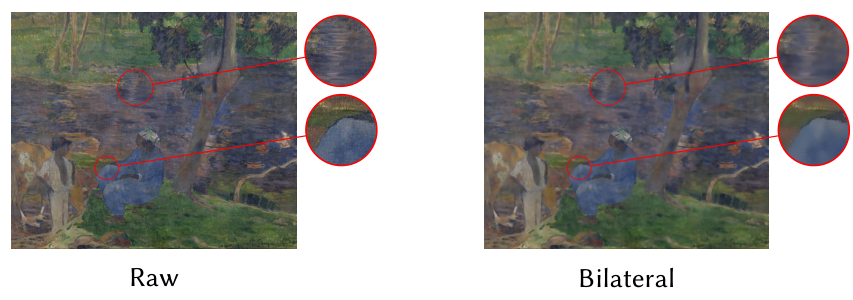

<a class='anchor' id='Smoothing_datasets'><h2 align="center"><font color='green'>1.2 Smoothing datasets[↑](#top)</font></h2></a> 

### All training data smoothing

In [23]:
'''
cd C:\Users\hujun\iCloudDrive\CUHK\STAT4012\project
listname = ['Alfred_Sisley/','Francisco_Goya/', 'Marc_Chagall/','Paul_Gauguin/','Paul_Klee/','Rembrandt/','Rene_Magritte/','Titian/'] 

for direc in listname:
    file = []
    for filename in os.listdir(direc):              #read all filenames under the folder
        file.append(filename)
    for name in file:                               #for each file, read and smooth it
        img = cv2.imread(direc+name)
        if img is None:
            continue
        gauss = cv2.GaussianBlur(img,(5,5),4)
        bilater = cv2.bilateralFilter(img,10,47,38)
        picname_gauss = name.replace('.jpg','_gauss')
        picname_bilat = name.replace('.jpg','_bilateral')
        cv2.imwrite(direc+picname_gauss+".jpg", gauss)
        cv2.imwrite(direc+picname_bilat+".jpg", bilater)
'''

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 6-7: truncated \UXXXXXXXX escape (2562070316.py, line 19)

### Test data smoothing

In [ ]:
'''

# Smooth datasets

cd C:\Users\hujun\iCloudDrive\CUHK\STAT4012\Project
    
file = []
direc ='test'
for filename in os.listdir(direc):              #read all filenames under the folder
    file.append(filename)
for name in file:                               #for each file, read and smooth it
    img = cv2.imread('test/'+name)
    if img is None:
        continue
    gauss = cv2.GaussianBlur(img,(5,5),4)
    bilater = cv2.bilateralFilter(img,10,47,38)
    picname_gauss = name.replace('.jpg','_gauss')
    picname_bilat = name.replace('.jpg','_bilateral')
    cv2.imwrite('test/'+picname_gauss+".jpg", gauss)
    cv2.imwrite('test/'+picname_bilat+".jpg", bilater)
    
'''

<a class='anchor' id='Data_preprocessing'><h1 align="center"><font color='green'>2. Data preprocessing[↑](#top)</font></h1></a> 

In [25]:
# Change the directory of the raw dataset
set_background('#e8f0fa')
np.random.seed(6)
data_dir = 'train_non_smoothed/'
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,      # normalize pixel values between 0 to 1
    validation_split=0.2
)

# use the flow_from_directory method to import the images from the directories
train_data = train_datagen.flow_from_directory(
    data_dir, # directory containing training images
    target_size=(224, 224),
    batch_size=batch_size,  # batch size for training data
    class_mode='categorical', # type of classification problem
    subset="training",
)

val_data = train_datagen.flow_from_directory(
    directory=data_dir,
    target_size=train_data.target_size,
    classes=list(train_data.class_indices.keys()),
    class_mode=train_data.class_mode,
    batch_size=train_data.batch_size,
    shuffle=train_data.shuffle,
    subset='validation'
)

# Visualize the data into matrix and one-hot encoding

# Extract one batch of the data
# X_train, y_train = next(train_data)

# Extract all batches of the data
X_train = []
y_train = []
for i in range(len(train_data)):
    batch = next(train_data)
    X_train.append(batch[0])
    y_train.append(batch[1])

X_train = np.concatenate(X_train)
y_train = np.concatenate(y_train)

# Extract all batches of the data
X_val = []
y_val = []
for i in range(len(val_data)):
    batch = next(val_data)
    X_val.append(batch[0])
    y_val.append(batch[1])

X_val = np.concatenate(X_val)
y_val = np.concatenate(y_val)

centered('Training feature shape is {}'.format(X_train.shape))
centered('Training class shape is {}'.format(y_train.shape))
centered('Evaluating feature shape is {}'.format(X_val.shape))
centered('Evaluating class shape is {}'.format(y_val.shape))

Found 1460 images belonging to 8 classes.
Found 360 images belonging to 8 classes.


In [61]:
#Pickle can save variables

'''
if __name__=='__main__':
    filename=save_variable((X_train,y_train,X_val,y_val),'vectorized_data_ricky.txt')
    X_train1,y_train1,X_val1,y_val1=load_variavle('vectorized_data_ricky.txt')
    print(np.allclose(X_train1,X_train),np.allclose(y_train1,y_train),np.allclose(X_val1,X_val),np.allclose(y_val1,y_val))
'''


True True True True


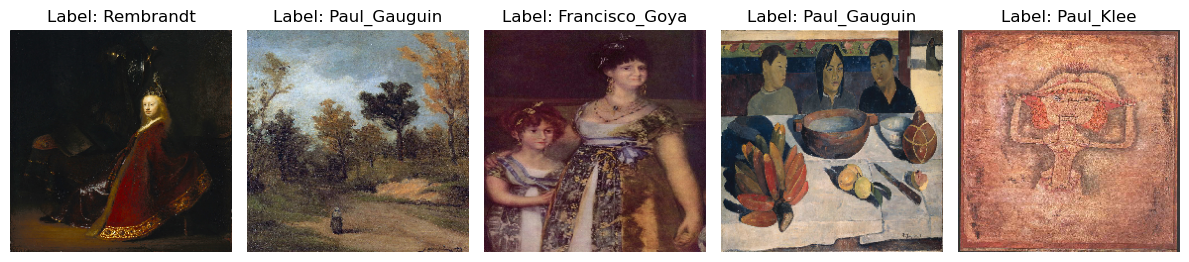

In [25]:
set_background('#e8f0fa')
class_names = list(train_data.class_indices.keys())

fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(12, 4))

for i in range(5):
    index = np.random.randint(batch_size)
    image = train_data[0][0][index]
    label_index = np.argmax(train_data[0][1][index])
    label = class_names[label_index]
    axes[i].imshow(image)
    axes[i].set_title(f"Label: {label}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()

<a class='anchor' id='Pretrained_model_performance'><h1 align="center"><font color='green'>3. Pretrained model performance[↑](#top)</font></h1></a> 

In [11]:
from tensorflow.keras.applications import *

train_input_shape = (224, 224, 3)
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=train_input_shape)

for layer in base_model.layers:
    layer.trainable = True
    
# Add layers at the end


n_classes = 8

X = base_model.output
X = Flatten()(X)

X = Dense(512, kernel_initializer='he_normal')(X)
#X = Dropout(0.5)(X)
X = BatchNormalization()(X)
X = Activation('relu')(X)

X = Dense(16, kernel_initializer='he_normal')(X)
#X = Dropout(0.5)(X)
X = BatchNormalization()(X)
X = Activation('relu')(X)

output = Dense(n_classes, activation='softmax')(X)

base_model1 = tf.keras.Model(inputs=base_model.input, outputs=output)

In [12]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
base_model1.compile(loss='categorical_crossentropy',
              optimizer=optimizer, 
              metrics=['accuracy'])#tfa.metrics.F1Score(8)

#n_epoch = 10

#early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20, verbose=1, 
#                           mode='auto', restore_best_weights=True)

#reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, 
#                              verbose=1, mode='auto')

history1 = base_model1.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val))#,callbacks=[neptune_cbk])

Epoch 1/50
137/137 [==============================] - 25s 144ms/step - loss: 0.9231 - accuracy: 0.8426 - val_loss: 2.2964 - val_accuracy: 0.1065
Epoch 2/50
137/137 [==============================] - 17s 121ms/step - loss: 0.5881 - accuracy: 0.9945 - val_loss: 2.1870 - val_accuracy: 0.0964
Epoch 3/50
137/137 [==============================] - 17s 122ms/step - loss: 0.4999 - accuracy: 0.9991 - val_loss: 2.1659 - val_accuracy: 0.1074
Epoch 4/50
137/137 [==============================] - 17s 121ms/step - loss: 0.4331 - accuracy: 0.9998 - val_loss: 2.1182 - val_accuracy: 0.1579
Epoch 5/50
137/137 [==============================] - 17s 122ms/step - loss: 0.3827 - accuracy: 0.9995 - val_loss: 1.8330 - val_accuracy: 0.3297
Epoch 6/50
137/137 [==============================] - 17s 122ms/step - loss: 0.3358 - accuracy: 0.9998 - val_loss: 1.5125 - val_accuracy: 0.4949
Epoch 7/50
137/137 [==============================] - 17s 122ms/step - loss: 0.2952 - accuracy: 0.9998 - val_loss: 1.1062 - val_ac

KeyboardInterrupt: 

In [42]:
#base_model1.save('resnet50_unsmoothed_78.h5')

In [ ]:
'''
history1 = base_model1.fit_generator(generator=train_generator, steps_per_epoch=STEP_SIZE_TRAIN,
                              validation_data=valid_generator, validation_steps=STEP_SIZE_VALID,
                              epochs=n_epoch,
                              shuffle=True,
                              verbose=1,
                              callbacks=[reduce_lr],
                              use_multiprocessing=True,
                              workers=16,
                              class_weight=class_weights
                             )
'''

<h1><center>NON-smoothed</center></h1>

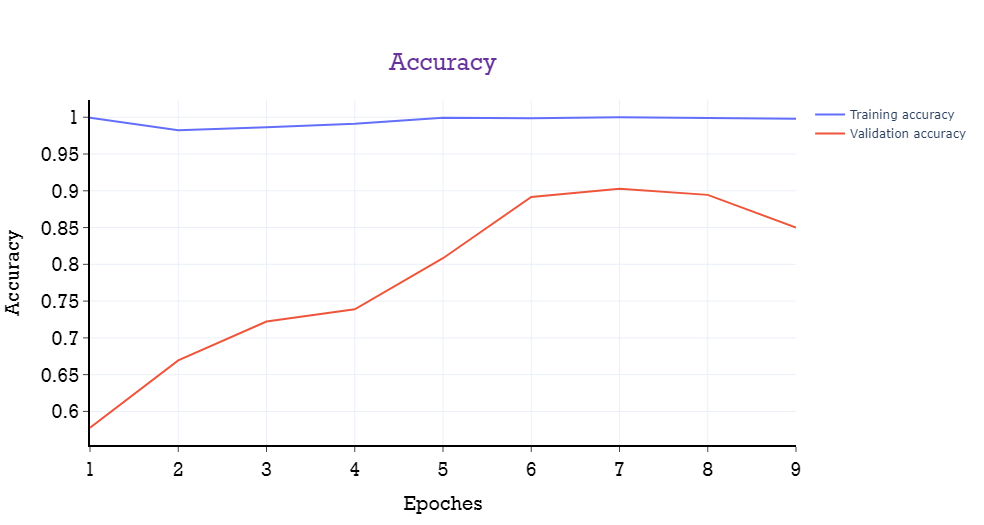

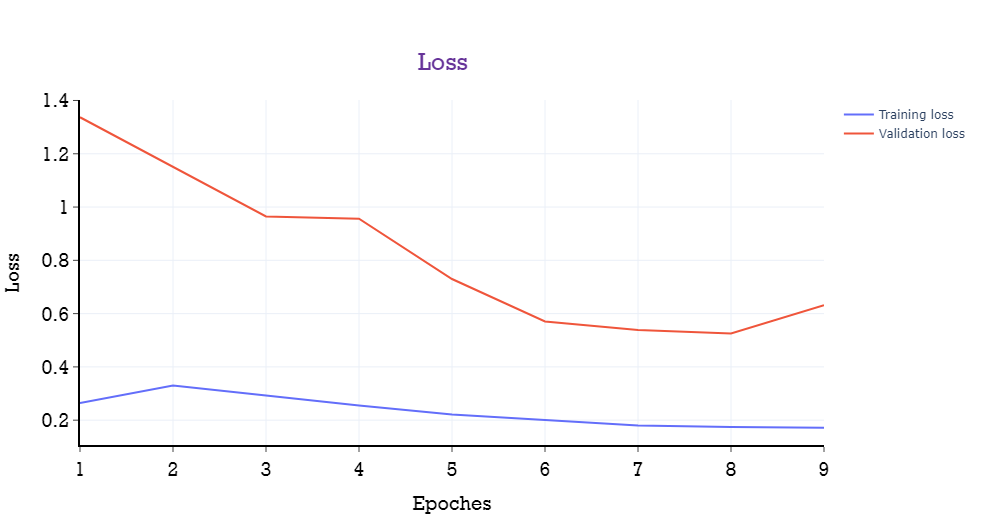

F1-score: 0.781

Fbeta-score: 0.776

Accuracy: 0.782

<a class='anchor' id='Tailored_model'><h1 align="center"><font color='green'>4. Tailored models[↑](#top)</font></h1></a> 

<a class='anchor' id='CNN_LSTM'><h2 align="center"><font color='green'>4.1 CNN-LSTM[↑](#top)</font></h2></a> 

In [26]:
#run = neptune.init_run(
#    project="STAT4012/STAT4012",
#    api_token="eyJhcGlfYWRkcmVzcyI6Imh0dHBzOi8vYXBwLm5lcHR1bmUuYWkiLCJhcGlfdXJsIjoiaHR0cHM6Ly9hcHAubmVwdHVuZS5haSIsImFwaV9rZXkiOiIyZjNjOGZiMS04MzA3LTRkY2UtOTg2Mi02ODc3ZWIxYzVhYWUifQ==",
#)  # your credentials

model = Sequential()
model.add(Conv2D(32, (2,2), padding = 'same', input_shape=(224, 224, 3),kernel_initializer=initializers.he_normal(seed=4012)))
model.add(InstanceNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3), padding = 'same',kernel_initializer=initializers.he_normal(seed=4012)))
model.add(InstanceNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128, (2, 2), padding='same',kernel_initializer=initializers.he_normal(seed=4012)))
model.add(InstanceNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3), padding='same',kernel_initializer=initializers.he_normal(seed=4012)))
model.add(InstanceNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3,3), padding = 'same',kernel_initializer=initializers.he_normal(seed=4012)))
model.add(InstanceNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dense(128,kernel_initializer=initializers.he_normal(seed=4012)))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Dense(64,kernel_initializer=initializers.he_normal(seed=4012)))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Dense(32,kernel_initializer=initializers.he_normal(seed=4012)))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(TimeDistributed(Flatten()))
model.add(LSTM(64,kernel_initializer=initializers.he_normal(seed=4012)))
model.add(Dense(8, activation='softmax',kernel_initializer=initializers.he_normal(seed=4012))) # Number of classes


optimizer = tf.keras.optimizers.Adam(learning_rate=0.0019)
model.compile(loss='categorical_crossentropy', 
              optimizer=optimizer,
              metrics=['accuracy'])#tf.keras.metrics.CategoricalAccuracy() tfa.metrics.F1Score(8)

#with io.StringIO() as s:
#    model.summary(print_fn=lambda x: s.write(x + "\n"))
#    model_summary = s.getvalue()

#run["training/model/summary"] = model_summary
#neptune_cbk = NeptuneCallback(run=run, base_namespace="metrics")

model.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val))#,callbacks=[neptune_cbk])


Epoch 1/20
137/137 [==============================] - 15s 88ms/step - loss: 1.2173 - accuracy: 0.5715 - val_loss: 1.6533 - val_accuracy: 0.4518
Epoch 2/20
137/137 [==============================] - 11s 82ms/step - loss: 0.6341 - accuracy: 0.7829 - val_loss: 1.6169 - val_accuracy: 0.4876
Epoch 3/20
137/137 [==============================] - 13s 99ms/step - loss: 0.3212 - accuracy: 0.8977 - val_loss: 1.1506 - val_accuracy: 0.6538
Epoch 4/20
137/137 [==============================] - 12s 85ms/step - loss: 0.1183 - accuracy: 0.9700 - val_loss: 1.1846 - val_accuracy: 0.6575
Epoch 5/20
137/137 [==============================] - 11s 81ms/step - loss: 0.0433 - accuracy: 0.9927 - val_loss: 1.3009 - val_accuracy: 0.6602
Epoch 6/20
137/137 [==============================] - 11s 80ms/step - loss: 0.0237 - accuracy: 0.9954 - val_loss: 1.3626 - val_accuracy: 0.6455
Epoch 7/20
137/137 [==============================] - 11s 81ms/step - loss: 0.1594 - accuracy: 0.9483 - val_loss: 1.9958 - val_accuracy:

KeyboardInterrupt: 

<h1><center>NON-smoothed</center></h1>

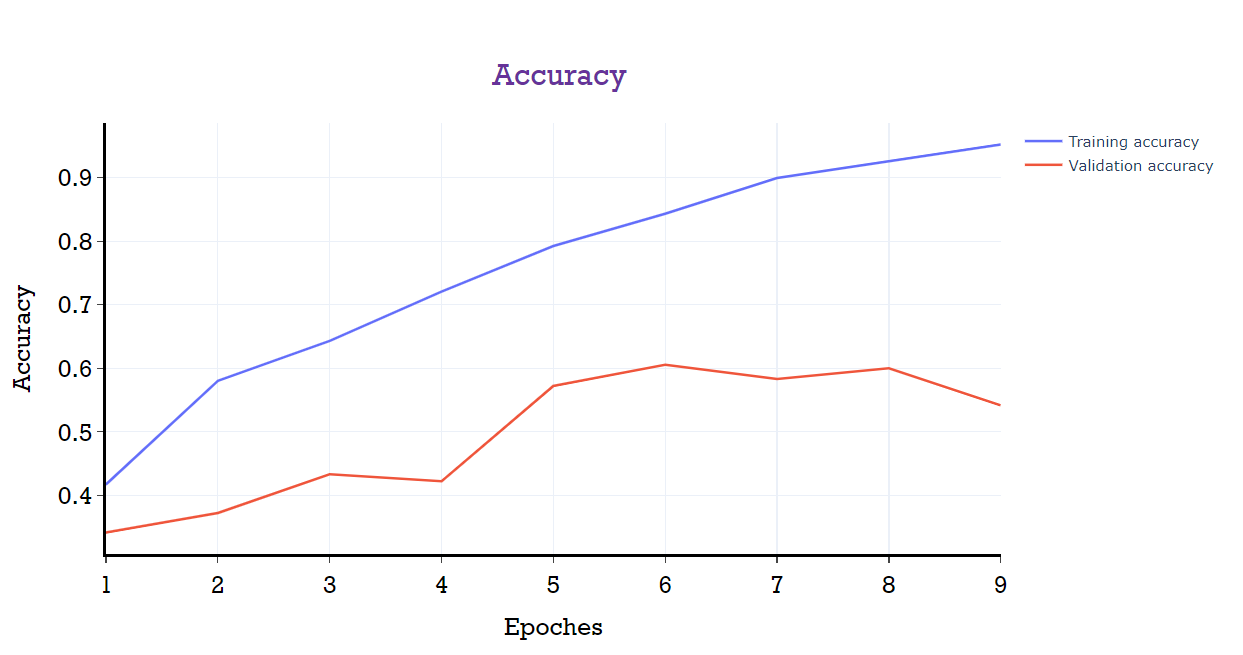

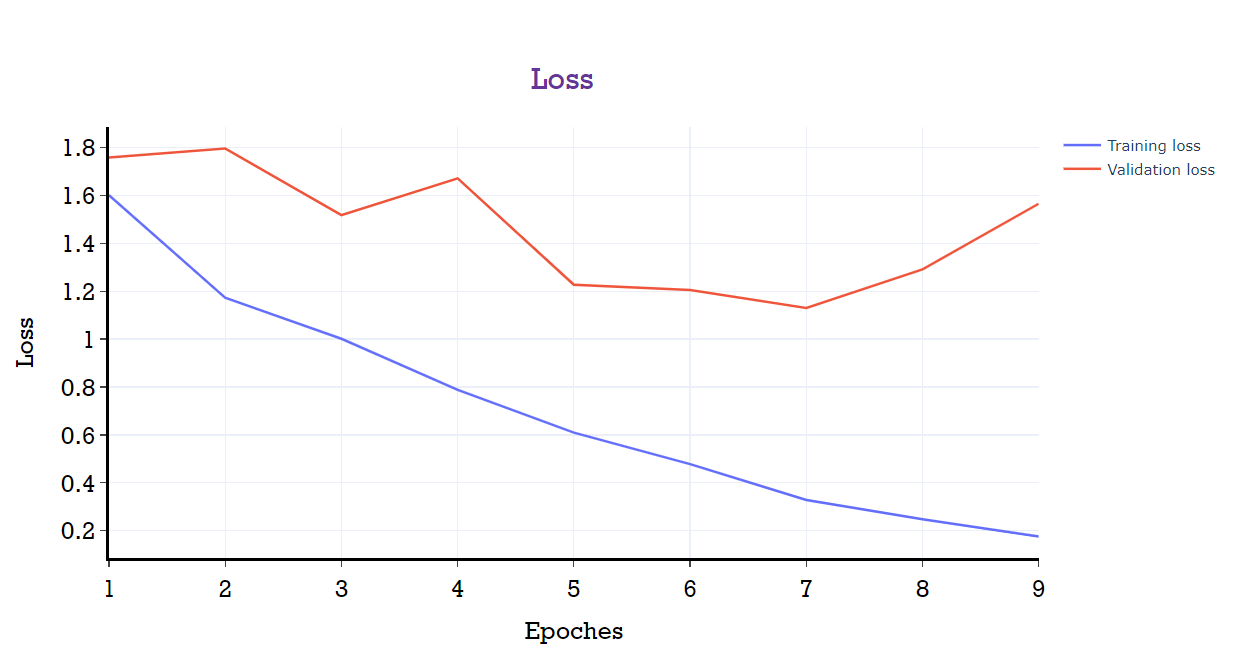

F1-score: 0.696

Fbeta-score: 0.691

Accuracy: 0.703

In [33]:
#model.save('cnn-lstm-unsmoothed-0.696.h5')

In [22]:
#cnn_lstm_745_model = keras.models.load_model('cnn-lstm-0.745.h5')
#cnn_lstm_745_model.param().get

#import keras.backend as K
##cnn_lstm_745_model
##Check model metrics like learning rate
#print(K.eval(cnn_lstm_745_model.metrics))
#print(K.eval(cnn_lstm_745_model.optimizer.lr))

<a class='anchor' id='CNN'><h2 align="center"><font color='green'>4.2 CNN[↑](#top)</font></h2></a> 

In [30]:
model2 = Sequential()
model2.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', 
                  padding="same",input_shape=(224, 224, 3), name="Block1_Conv1"))
model2.add(MaxPooling2D(pool_size=(3,3), name="Block1_Pool"))
model2.add(BatchNormalization(name="Block1_BatchNorm"))
                                    
model2.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding="same", name="Block2_Conv1"))
model2.add(InstanceNormalization())
model2.add(MaxPooling2D(pool_size=(2,2), name="Block2_Pool"))
model2.add(BatchNormalization(name="Block2_BatchNorm"))
                                    
model2.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding="same", name="Block3_Conv"))
model2.add(MaxPooling2D(pool_size=(2,2), name="Block3_Pool"))
model2.add(BatchNormalization(name="Block3_BatchNorm"))
                                    
model2.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding="same", name="Block4_Conv"))
model2.add(InstanceNormalization())
model2.add(MaxPooling2D(pool_size=(2,2), name="Block4_Pool"))
model2.add(BatchNormalization(name="Block4_BatchNorm"))

model2.add(Flatten(name="Flatten_layer"))
model2.add(Dense(64, activation='relu', name="fc"))
model2.add(Dropout(0.2, name="Dropout"))
model2.add(Dense(8, activation='softmax', name="Prediction"))

model2.compile(
    optimizer=keras.optimizers.Adam(0.001), 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)

model2.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    epochs=20,
    verbose=1
)

Epoch 1/20
137/137 [==============================] - 6s 38ms/step - loss: 1.1563 - accuracy: 0.6170 - val_loss: 2.1001 - val_accuracy: 0.4564
Epoch 2/20
137/137 [==============================] - 5s 34ms/step - loss: 0.3050 - accuracy: 0.9003 - val_loss: 2.0242 - val_accuracy: 0.5096
Epoch 3/20
137/137 [==============================] - 5s 34ms/step - loss: 0.1380 - accuracy: 0.9572 - val_loss: 2.1642 - val_accuracy: 0.5271
Epoch 4/20
137/137 [==============================] - 5s 34ms/step - loss: 0.0744 - accuracy: 0.9764 - val_loss: 1.8293 - val_accuracy: 0.5895
Epoch 5/20
137/137 [==============================] - 5s 34ms/step - loss: 0.0569 - accuracy: 0.9819 - val_loss: 1.8688 - val_accuracy: 0.6006
Epoch 6/20
137/137 [==============================] - 5s 36ms/step - loss: 0.0847 - accuracy: 0.9732 - val_loss: 2.0358 - val_accuracy: 0.5675
Epoch 7/20
 69/137 [==============>...............] - ETA: 2s - loss: 0.1023 - accuracy: 0.9651

KeyboardInterrupt: 

<h1><center>NON-smoothed</center></h1>

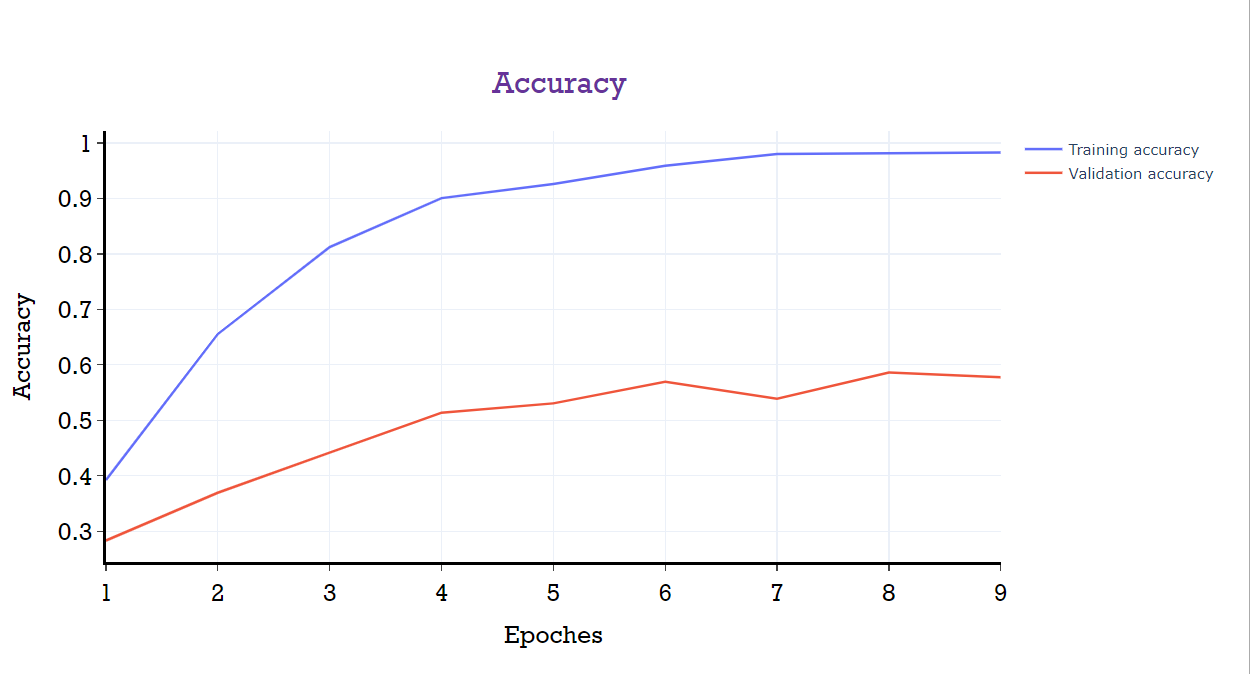

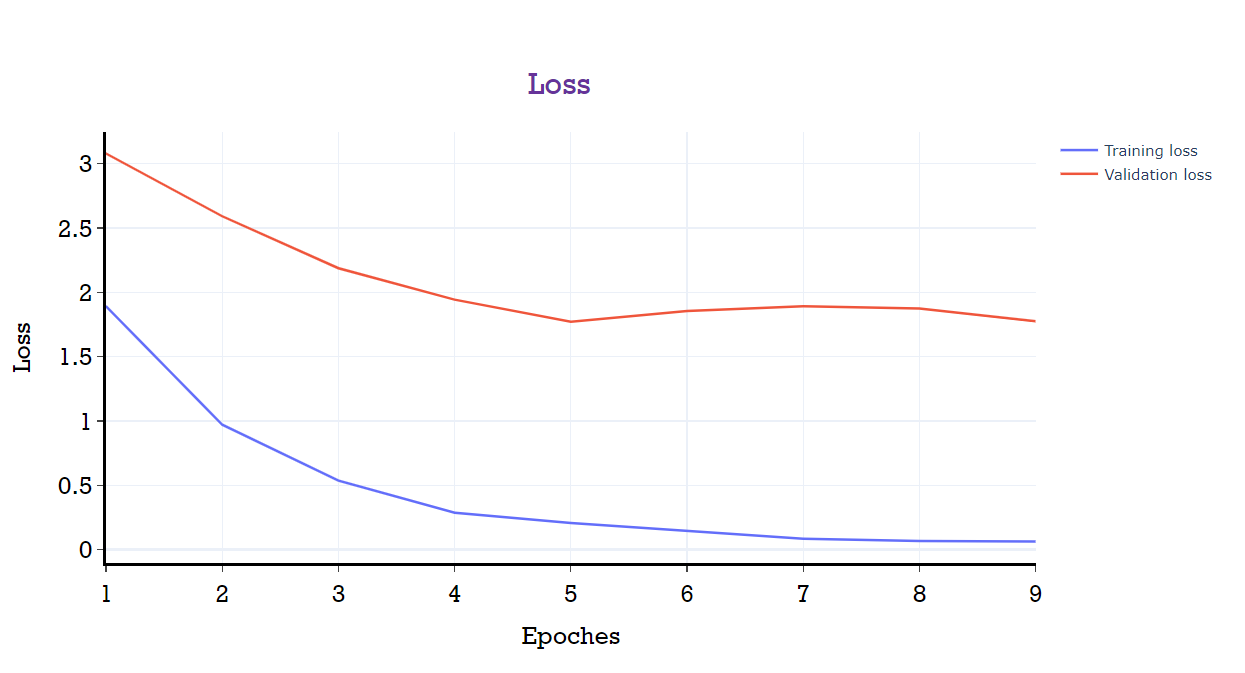

F1-score: 0.582

Fbeta-score: 0.569

Accuracy: 0.589

<h1><center>Smoothed</center></h1>

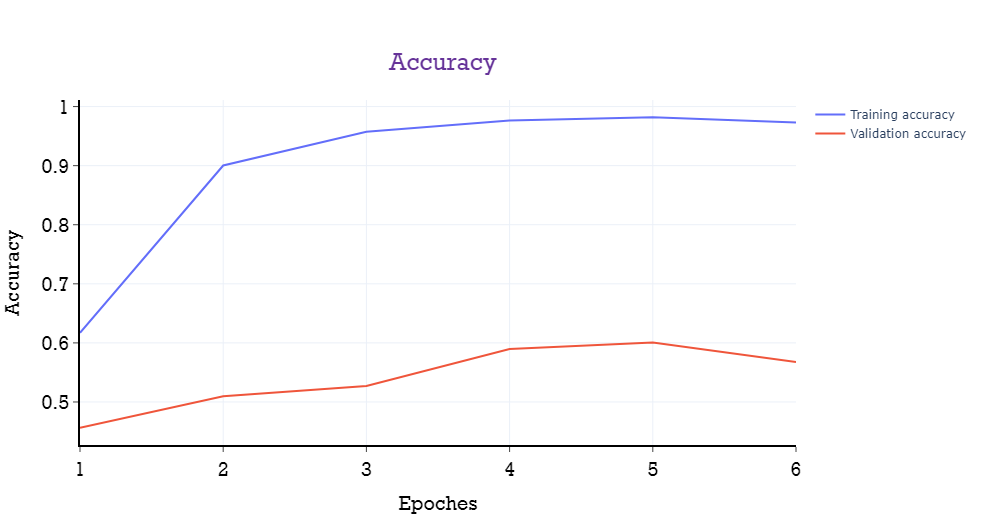

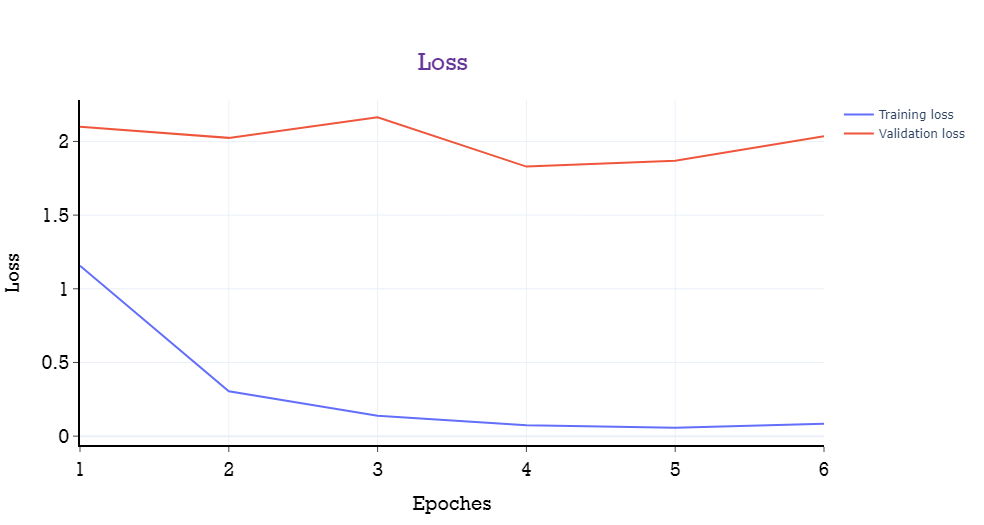

F1-score: 0.634
    
Fbeta-score: 0.637
    
Accuracy: 0.644

<a class='anchor' id='Alex_net'><h2 align="center"><font color='green'>4.3 Alexnet[↑](#top)</font></h2></a> 

In [27]:
model3 = Sequential()

model3.add(Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), 
                 activation='relu', input_shape=(224, 224, 3), padding="same", name="Block1_Conv"))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), name="Block1_pool"))

model3.add(Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same", name="Block2_Conv"))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), name="Block2_pool"))

#model3.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same", name="Block3_Conv1"))
#model3.add(BatchNormalization())

#model3.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same", name="Block3_Conv2"))
#model3.add(BatchNormalization())

model3.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same", name="Block3_Conv3"))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), name="Block3_pool"))

model3.add(Flatten())
model3.add(Dense(256, activation='relu', name="fc1"))
model3.add(Dropout(0.5))

model3.add(Dense(384, activation='relu', name="fc2"))
model3.add(Dropout(0.5))
model3.add(Dense(8, activation='softmax', name="prediction"))

model3.compile(
    optimizer=keras.optimizers.Adam(0.0001), 
    loss='categorical_crossentropy', 
    metrics='accuracy'
)

model3.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    epochs=20,
    verbose=1
)

Epoch 1/20
46/46 [==============================] - 2s 28ms/step - loss: 2.5026 - accuracy: 0.2767 - val_loss: 2.3621 - val_accuracy: 0.0556
Epoch 2/20
46/46 [==============================] - 1s 17ms/step - loss: 1.7164 - accuracy: 0.3801 - val_loss: 3.8736 - val_accuracy: 0.1528
Epoch 3/20
46/46 [==============================] - 1s 18ms/step - loss: 1.5914 - accuracy: 0.4205 - val_loss: 4.0646 - val_accuracy: 0.1528
Epoch 4/20
46/46 [==============================] - 1s 18ms/step - loss: 1.4712 - accuracy: 0.4808 - val_loss: 4.5568 - val_accuracy: 0.1556
Epoch 5/20
46/46 [==============================] - 1s 17ms/step - loss: 1.4382 - accuracy: 0.4877 - val_loss: 5.9658 - val_accuracy: 0.1556
Epoch 6/20
46/46 [==============================] - 1s 17ms/step - loss: 1.3329 - accuracy: 0.5363 - val_loss: 5.5709 - val_accuracy: 0.2028
Epoch 7/20
46/46 [==============================] - 1s 17ms/step - loss: 1.3244 - accuracy: 0.5466 - val_loss: 4.0575 - val_accuracy: 0.2361
Epoch 8/20
46

<h1><center>NON-smoothed</center></h1>

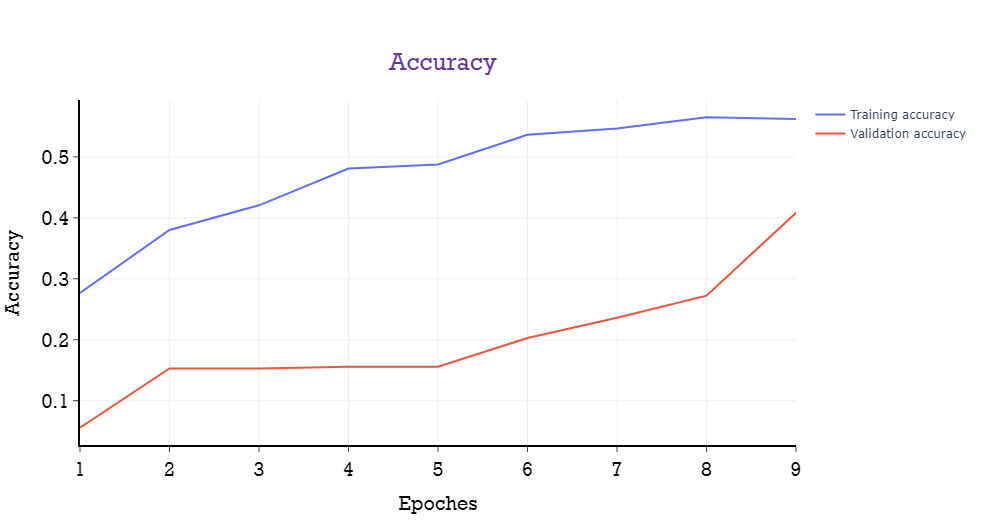

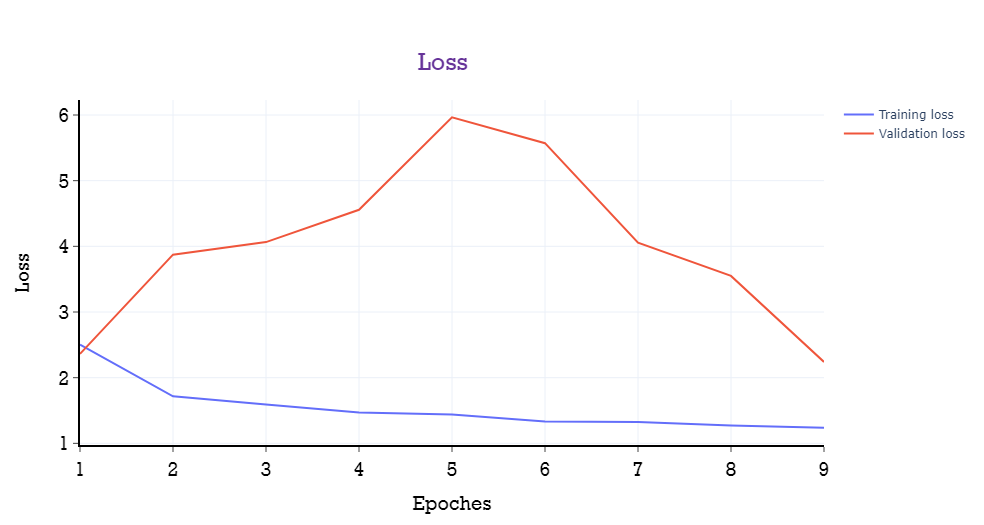

F1-score: 0.637

Fbeta-score: 0.637

Accuracy: 0.644

<h1><center>Smoothed</center></h1>

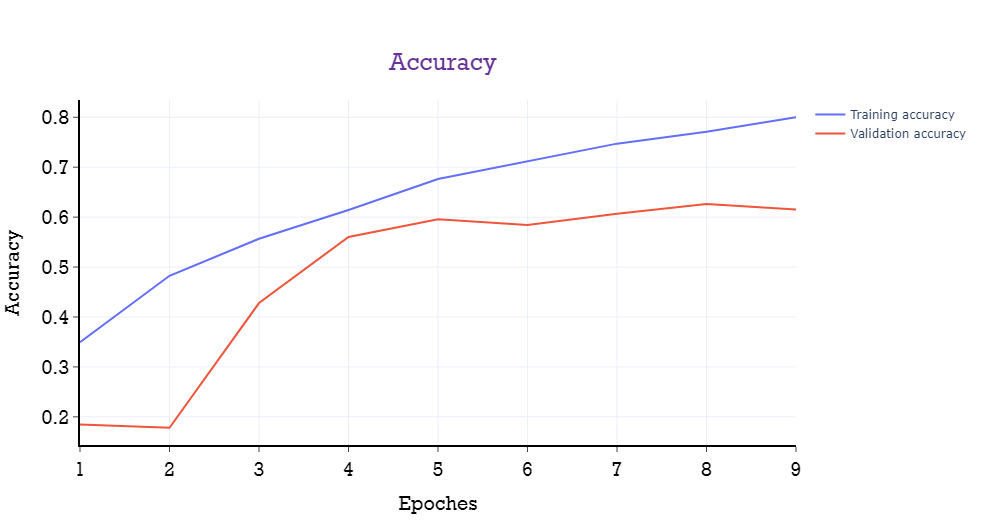

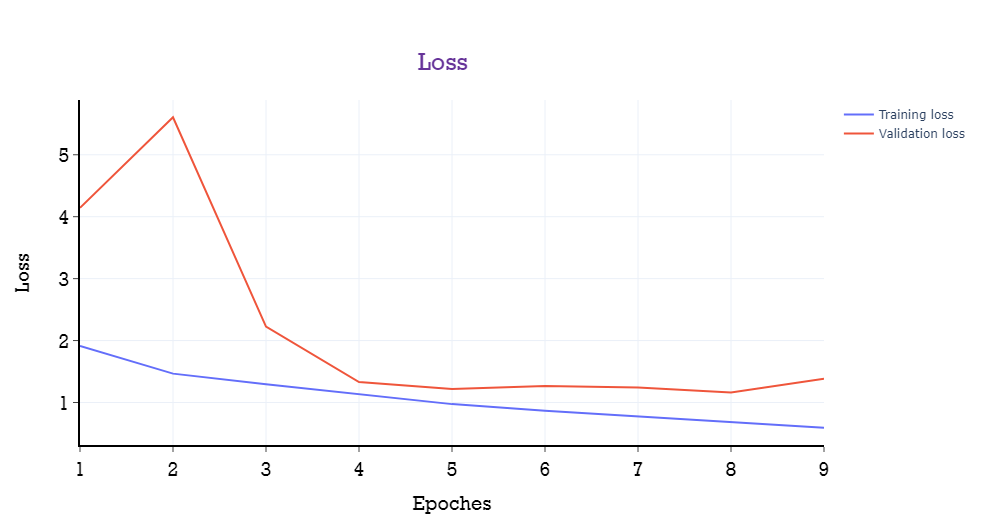

F1-score: 0.701

Fbeta-score: 0.700

Accuracy: 0.708

<a class='anchor' id='Visualization_filter_map'><h1 align="center"><font color='green'>5. Visualization of kernal filters and feature map[↑](#top)</font></h1></a> 

<a class='anchor' id='Metrics_visualization'><h2 align="center"><font color='green'>5.1 Training metrics visualization[↑](#top)</font></h2></a> 

In [28]:
import chart_studio.plotly as py
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
py.sign_in('ricardowu', 'a0dWfwxY0tchpbks0Enf')
fig = go.Figure()
fig.add_trace(go.Scatter(x=[x for x in range(1,10,1)], y=model3.history.history['accuracy'],
                    mode='lines',
                    name='Training accuracy'))
fig.add_trace(go.Scatter(x=[x for x in range(1,10,1)], y=model3.history.history['val_accuracy'],
                    mode='lines',
                    name='Validation accuracy'))

fig.update_layout(
    xaxis=dict(
        title_text='Epoches',
        titlefont=dict(
            family='Rockwell',
            size=20,
            color='black',
        ),
        showline=True,
        showgrid=True,
        showticklabels=True,
        linecolor='black',
        linewidth=2,
        ticks='outside',
        tickfont=dict(
            family='Rockwell',
            size=20,
            color='black',
        ),
    ),
    yaxis=dict(
        title_text='Accuracy',
        titlefont=dict(
            family='Rockwell',
            size=20,
            color='black',
        ),
        showline=True,
        showgrid=True,
        showticklabels=True,
        linecolor='black',
        linewidth=2,
        ticks='outside',
        tickfont=dict(
            family='Rockwell',
            size=20,
            color='black',
        ),
    ),
    showlegend=True,
    template = 'plotly_white',
    title_font=dict(family="Rockwell",size=25,color="RebeccaPurple"),
    title={
        'text': "Accuracy",
        'y':0.9,
        'x':0.45,
        'xanchor': 'center',
        'yanchor': 'top',
        },
    legend_title = dict(font = dict(family = "Courier", size = 20))

)
#,title="Accuracy",font=dict(family="Courier New, monospace",size=25,color="RebeccaPurple"))
#run["train/metrics/accuracy"] = fig

fig.show()

In [29]:
py.sign_in('ricardowu', 'a0dWfwxY0tchpbks0Enf')

fig = go.Figure()
fig.add_trace(go.Scatter(x=[x for x in range(1,10,1)], y=model3.history.history['loss'],
                    mode='lines',
                    name='Training loss'))
fig.add_trace(go.Scatter(x=[x for x in range(1,10,1)], y=model3.history.history['val_loss'],
                    mode='lines',
                    name='Validation loss'))

fig.update_layout(
    xaxis=dict(
        title_text='Epoches',
        titlefont=dict(
            family='Rockwell',
            size=20,
            color='black',
        ),
        showline=True,
        showgrid=True,
        showticklabels=True,
        linecolor='black',
        linewidth=2,
        ticks='outside',
        tickfont=dict(
            family='Rockwell',
            size=20,
            color='black',
        ),
    ),
    yaxis=dict(
        title_text='Loss',
        titlefont=dict(
            family='Rockwell',
            size=20,
            color='black',
        ),
        showline=True,
        showgrid=True,
        showticklabels=True,
        linecolor='black',
        linewidth=2,
        ticks='outside',
        tickfont=dict(
            family='Rockwell',
            size=20,
            color='black',
        ),
    ),
    showlegend=True,
    template = 'plotly_white',
    title_font=dict(family="Rockwell",size=25,color="RebeccaPurple"),
    title={
        'text': "Loss",
        'y':0.9,
        'x':0.45,
        'xanchor': 'center',
        'yanchor': 'top',
        },
    legend_title = dict(font = dict(family = "Courier", size = 20))

)
#,title="Accuracy",font=dict(family="Courier New, monospace",size=25,color="RebeccaPurple"))

#run["train/metrics/loss"] = fig
fig.show()

In [1]:
#plt.plot(model.history.history['accuracy'])
#plt.plot(model.history.history['val_accuracy'])
#plt.title('model accuracy')
#plt.ylabel('accuracy')
#plt.xlabel('epoch')
#plt.legend(['train', 'test'], loc='upper left')
#plt.show()
# summarize history for loss
#plt.plot(model.history.history['loss'])
#plt.plot(model.history.history['val_loss'])
#plt.title('model loss')
#plt.ylabel('loss')
#plt.xlabel('epoch')
#plt.legend(['train', 'test'], loc='upper left')
#plt.show()

#if __name__=='__main__':
#    save_variable((model.history.history['loss'], model.history.history['accuracy'], model.history.history['val_loss'], model.history.history['val_accuracy']),'ricky_smoothed.txt')

<a class='anchor' id='Kernal'><h2 align="center"><font color='green'>5.1 Kernal filter[↑](#top)</font></h2></a> 

In [ ]:
'''
Check conv layer for visualizing feature map, and save the latyer index into conv2d_layer_index
'''

conv2d_layer_index = [] 

for i in range(len(model.layers)):
	layer = model.layers[i]
	# check for convolutional layer
	if 'conv' not in layer.name:
		continue
	# summarize output shape
	conv2d_layer_index.append(i)
	print(i, layer.name, layer.output.shape)

In [ ]:
'''
plot_kernal is for model only, not for feature_map_model
'''

def plot_kernal(n_layer,n_channel): #n_layer is for choosing the layer
    filters, biases = model.layers[n_layer].get_weights()
    print('There are {} chanels and {} kernal filters in this layer'.format(filters[0][0].shape[0],filters[0][0].shape[1]))
    n_filters, kernal_ix = filters[0][0][n_channel].shape[0], 0
    row_n, column_n = n_filters//8, 8
    fig, ax = pyplot.subplots(row_n, column_n, figsize=(25,12))
    # plot each channel separately
    for row in range(row_n):
        for column in range(column_n):
        # specify subplot and turn of axis
            ax[row][column].set_xticks([])
            ax[row][column].set_yticks([])
            # plot filter channel in grayscale
            f = filters[:, :, :, kernal_ix]
            ax[row][column].imshow(f[:, :, 1])#cmap='gray'
            kernal_ix += 1
    # show the figure
    pyplot.show()
    
the_desired_layer = 0
the_desired_channel_in_this_layer = 0
    
plot_kernal(the_desired_layer,the_desired_channel_in_this_layer)

<a class='anchor' id='Feature_map'><h2 align="center"><font color='green'>5.2 Feature map[↑](#top)</font></h2></a> 

In [ ]:
'''
Create a model object to save the conv layers only
'''

ixs = conv2d_layer_index
outputs = [model.layers[i+1].output for i in ixs]
feature_map_model = tf.keras.Model(inputs=model.inputs, outputs=outputs)
feature_map_model.summary()

In [ ]:
'''
Output feature map matrix, this is for feature_map_model only
'''
def plot_feature_map(n_layer): #n_layer is for choosing the layer
    fig_n = feature_maps[n_layer][0][0][0].shape[0]  #Check conv2d_layer_index
    row_n, column_n = fig_n//8, 8
    fig, ax = pyplot.subplots(row_n, column_n, figsize=(25,12))
    ix=1
    for row in range(row_n):
        for column in range(column_n):
            ax[row][column].set_xticks([])
            ax[row][column].set_yticks([])
            # plot filter channel in grayscale
            ax[row][column].imshow(feature_maps[n_layer][0, :, :, ix-1]) #cmap='gray'
            ix += 1
            # show the figure
    pyplot.show()

the_image_index_in_testset = 0
the_layer_of_feature_map = 0

feature_maps = feature_map_model.predict(X_test[[the_image_index_in_testset]]) #Choose the desired image in test set
plot_feature_map(the_layer_of_feature_map) #Plot first layer feature maps

In [ ]:
#img = tf.keras.utils.load_img('iCloudDrive/CUHK/STAT4012/Project/test/Alfred_Sisley/Alfred_Sisley_10.jpg', target_size=(224, 224))
#img = tf.keras.utils.img_to_array(img)
## expand dimensions so that it represents a single 'sample'
#img = tf.expand_dims(img, axis=0)
#img = tf.keras.applications.resnet50.preprocess_input(img)
#feature_maps = feature_map_model.predict(img)

<a class='anchor' id='Testing'><h1 align="center"><font color='green'>6. Testing[↑](#top)</font></h1></a> 

In [30]:
cd A:\STAT4012\test

A:\STAT4012\test


In [18]:
# Change the directory of the raw dataset
np.random.seed(6)
data_dir = ''
batch_size = 32

class_names = ['Alfred_Sisley','Francisco_Goya', 'Marc_Chagall','Paul_Gauguin',
            'Paul_Klee','Rembrandt','Rene_Magritte','Titian'] 

test_datagen = ImageDataGenerator(
    rescale=1./255,      # normalize pixel values between 0 to 1
)

# use the flow_from_directory method to import the images from the directories
test_data = test_datagen.flow_from_directory(
    data_dir, # directory containing training images
    batch_size = batch_size,
    classes=class_names,
    target_size=(224, 224),
    class_mode='categorical',
)


# Extract all batches of the data
X_test = []
y_test = []
for i in range(len(test_data)):
    batch = next(test_data)
    X_test.append(batch[0])
    y_test.append(batch[1])

X_test = np.concatenate(X_test)
y_test = np.concatenate(y_test)

print(X_test.shape)

Found 202 images belonging to 8 classes.
(202, 224, 224, 3)


In [31]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score
import matplotlib.pyplot as plt
import plotly.figure_factory as ff
import chart_studio.plotly as py

y_pred = np.argmax(model3.predict(X_test),axis=1)
y_true = np.argmax(y_test,axis=1)

y_pred_labels = list(map(lambda x: class_names[x], y_pred))
y_true_labels = list(map(lambda x: class_names[x], y_true))
cm = confusion_matrix(y_true_labels, y_pred_labels)
py.sign_in('ricardowu', 'a0dWfwxY0tchpbks0Enf')
conf_matrix = ff.create_annotated_heatmap(cm,class_names,class_names,colorscale="Blues",showscale=True)
conf_matrix.update_layout(yaxis = dict(categoryorder = 'category descending'))#,title_text='Confusion Matrix'
conf_matrix.update_xaxes(title_text = 'Predicted class',title_font=dict(size=25, family='Courier', color='darkblue'))
conf_matrix.update_yaxes(title_text = 'True class',title_font=dict(size=25, family='Courier', color='darkred'))

conf_matrix.show()
#run["test/conf_matrix"].upload(conf_matrix)
#plot_url = py.plot(conf_matrix)

#fig, ax = plt.subplots(figsize=(8, 8))
#disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
#disp.plot(ax=ax, cmap=plt.cm.Blues, xticks_rotation='vertical')
#plt.show()
#plt.savefig('Confusion Matrix.png')

7/7 [==============================] - 0s 14ms/step


In [20]:
print(classification_report(y_true_labels, y_pred_labels))

                precision    recall  f1-score   support

 Alfred_Sisley       0.93      1.00      0.96        26
Francisco_Goya       0.86      0.63      0.73        30
  Marc_Chagall       0.92      0.96      0.94        24
  Paul_Gauguin       0.83      0.91      0.87        32
     Paul_Klee       0.85      0.89      0.87        19
     Rembrandt       0.75      0.81      0.78        26
 Rene_Magritte       0.88      0.70      0.78        20
        Titian       0.82      0.92      0.87        25

      accuracy                           0.85       202
     macro avg       0.85      0.85      0.85       202
  weighted avg       0.85      0.85      0.85       202



In [32]:
f1 = f1_score(y_true_labels, y_pred_labels, average='weighted')
fbeta = fbeta_score(y_true_labels, y_pred_labels, beta=2, average='macro')
accuracy = accuracy_score(y_true_labels, y_pred_labels)
#run["test/metrics"] = f1
#run["test/metrics"] = fbeta
#run["test/metrics"] = accuracy
print("F1-score: {:.3f}".format(f1))
print("Fbeta-score: {:.3f}".format(fbeta))
print("Accuracy: {:.3f}".format(accuracy))

F1-score: 0.637
Fbeta-score: 0.637
Accuracy: 0.644


<a class='anchor' id='Error_analysis'><h1 align="center"><font color='green'>7. Error analysis[↑](#top)</font></h1></a> 

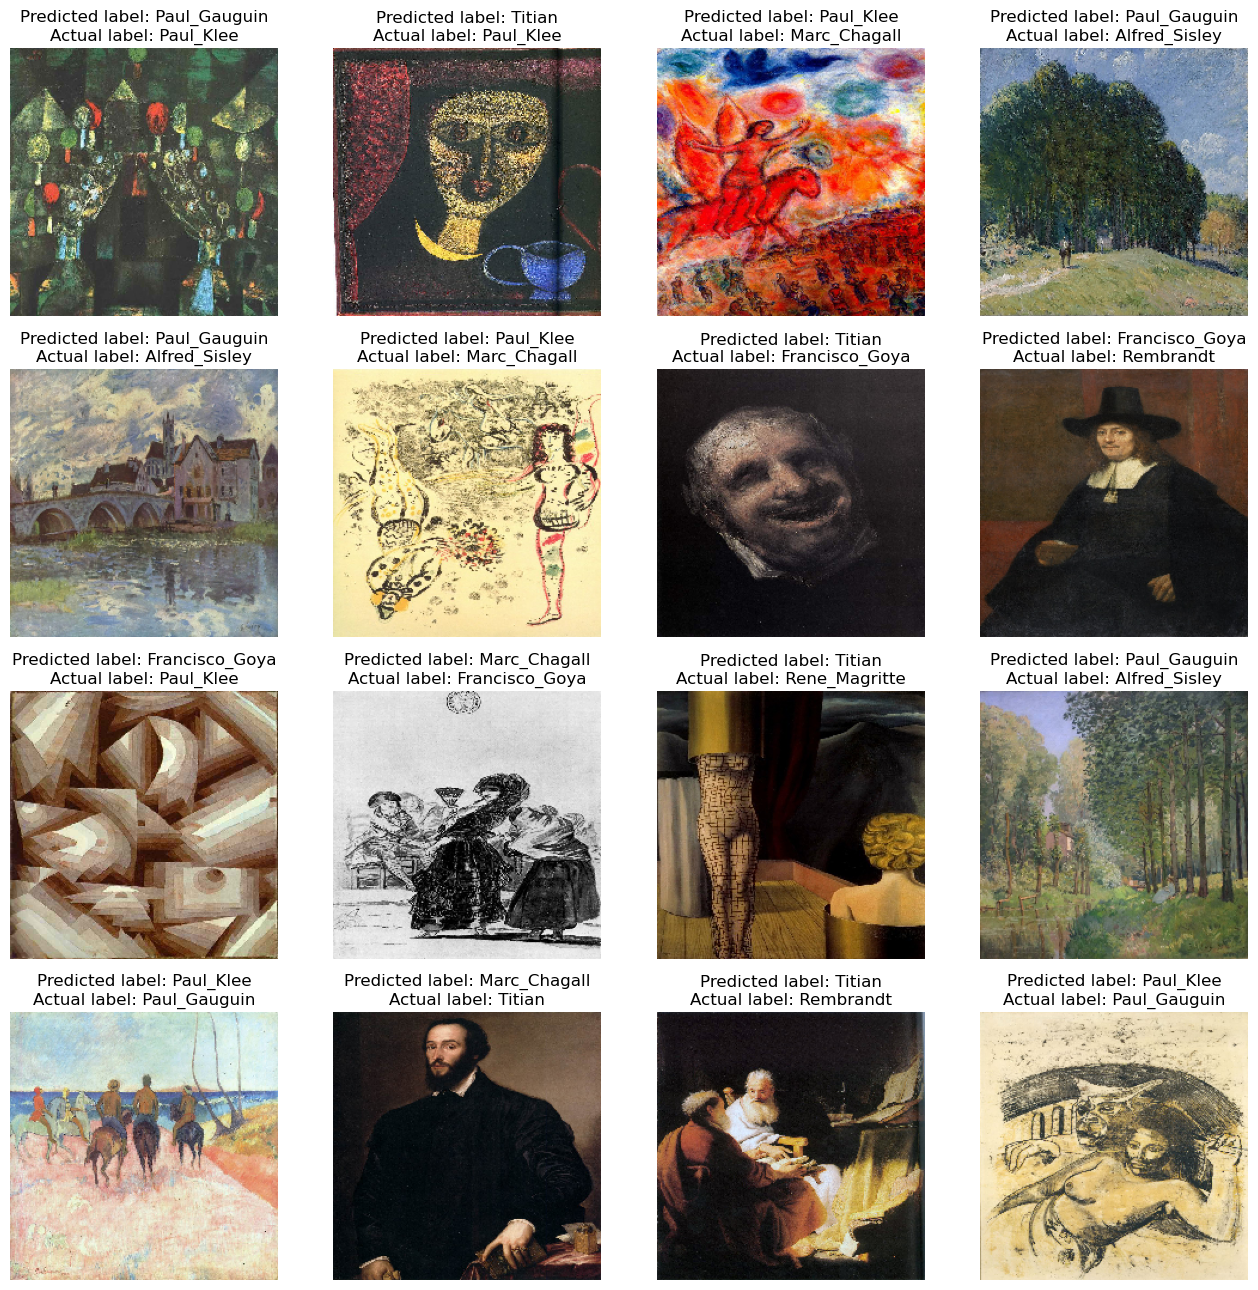

In [103]:
misclassified_indices = np.array(np.where(y_pred != y_true)[0])

misclassified_images = []
for i in misclassified_indices:
    img = X_test[i]
    y_pred_label = y_pred_labels[i]
    y_true_label = y_true_labels[i]
    misclassified_images.append((img, y_pred_label, y_true_label))

fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(16, 16))

for i, ax in enumerate(axes.flat):
    img, y_pred_label, y_true_label = misclassified_images[i]
    ax.imshow(img)
    ax.set_title('Predicted label: {}\nActual label: {}'.format(y_pred_label, y_true_label))
    ax.axis('off')

plt.show()